<a href="https://colab.research.google.com/github/JayanneAzevedo/Data_Science_Projects/blob/main/Health_Insurance_Cost_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Analysis and Prediction Model - Health Insurance Cost**
People usually do not know how health insurance market calculate their annual medical insurance cost, nor which variables are considered in this math.
For this reason, this notebook will analyze these data and create a prediction model for the annual health insurance cost.

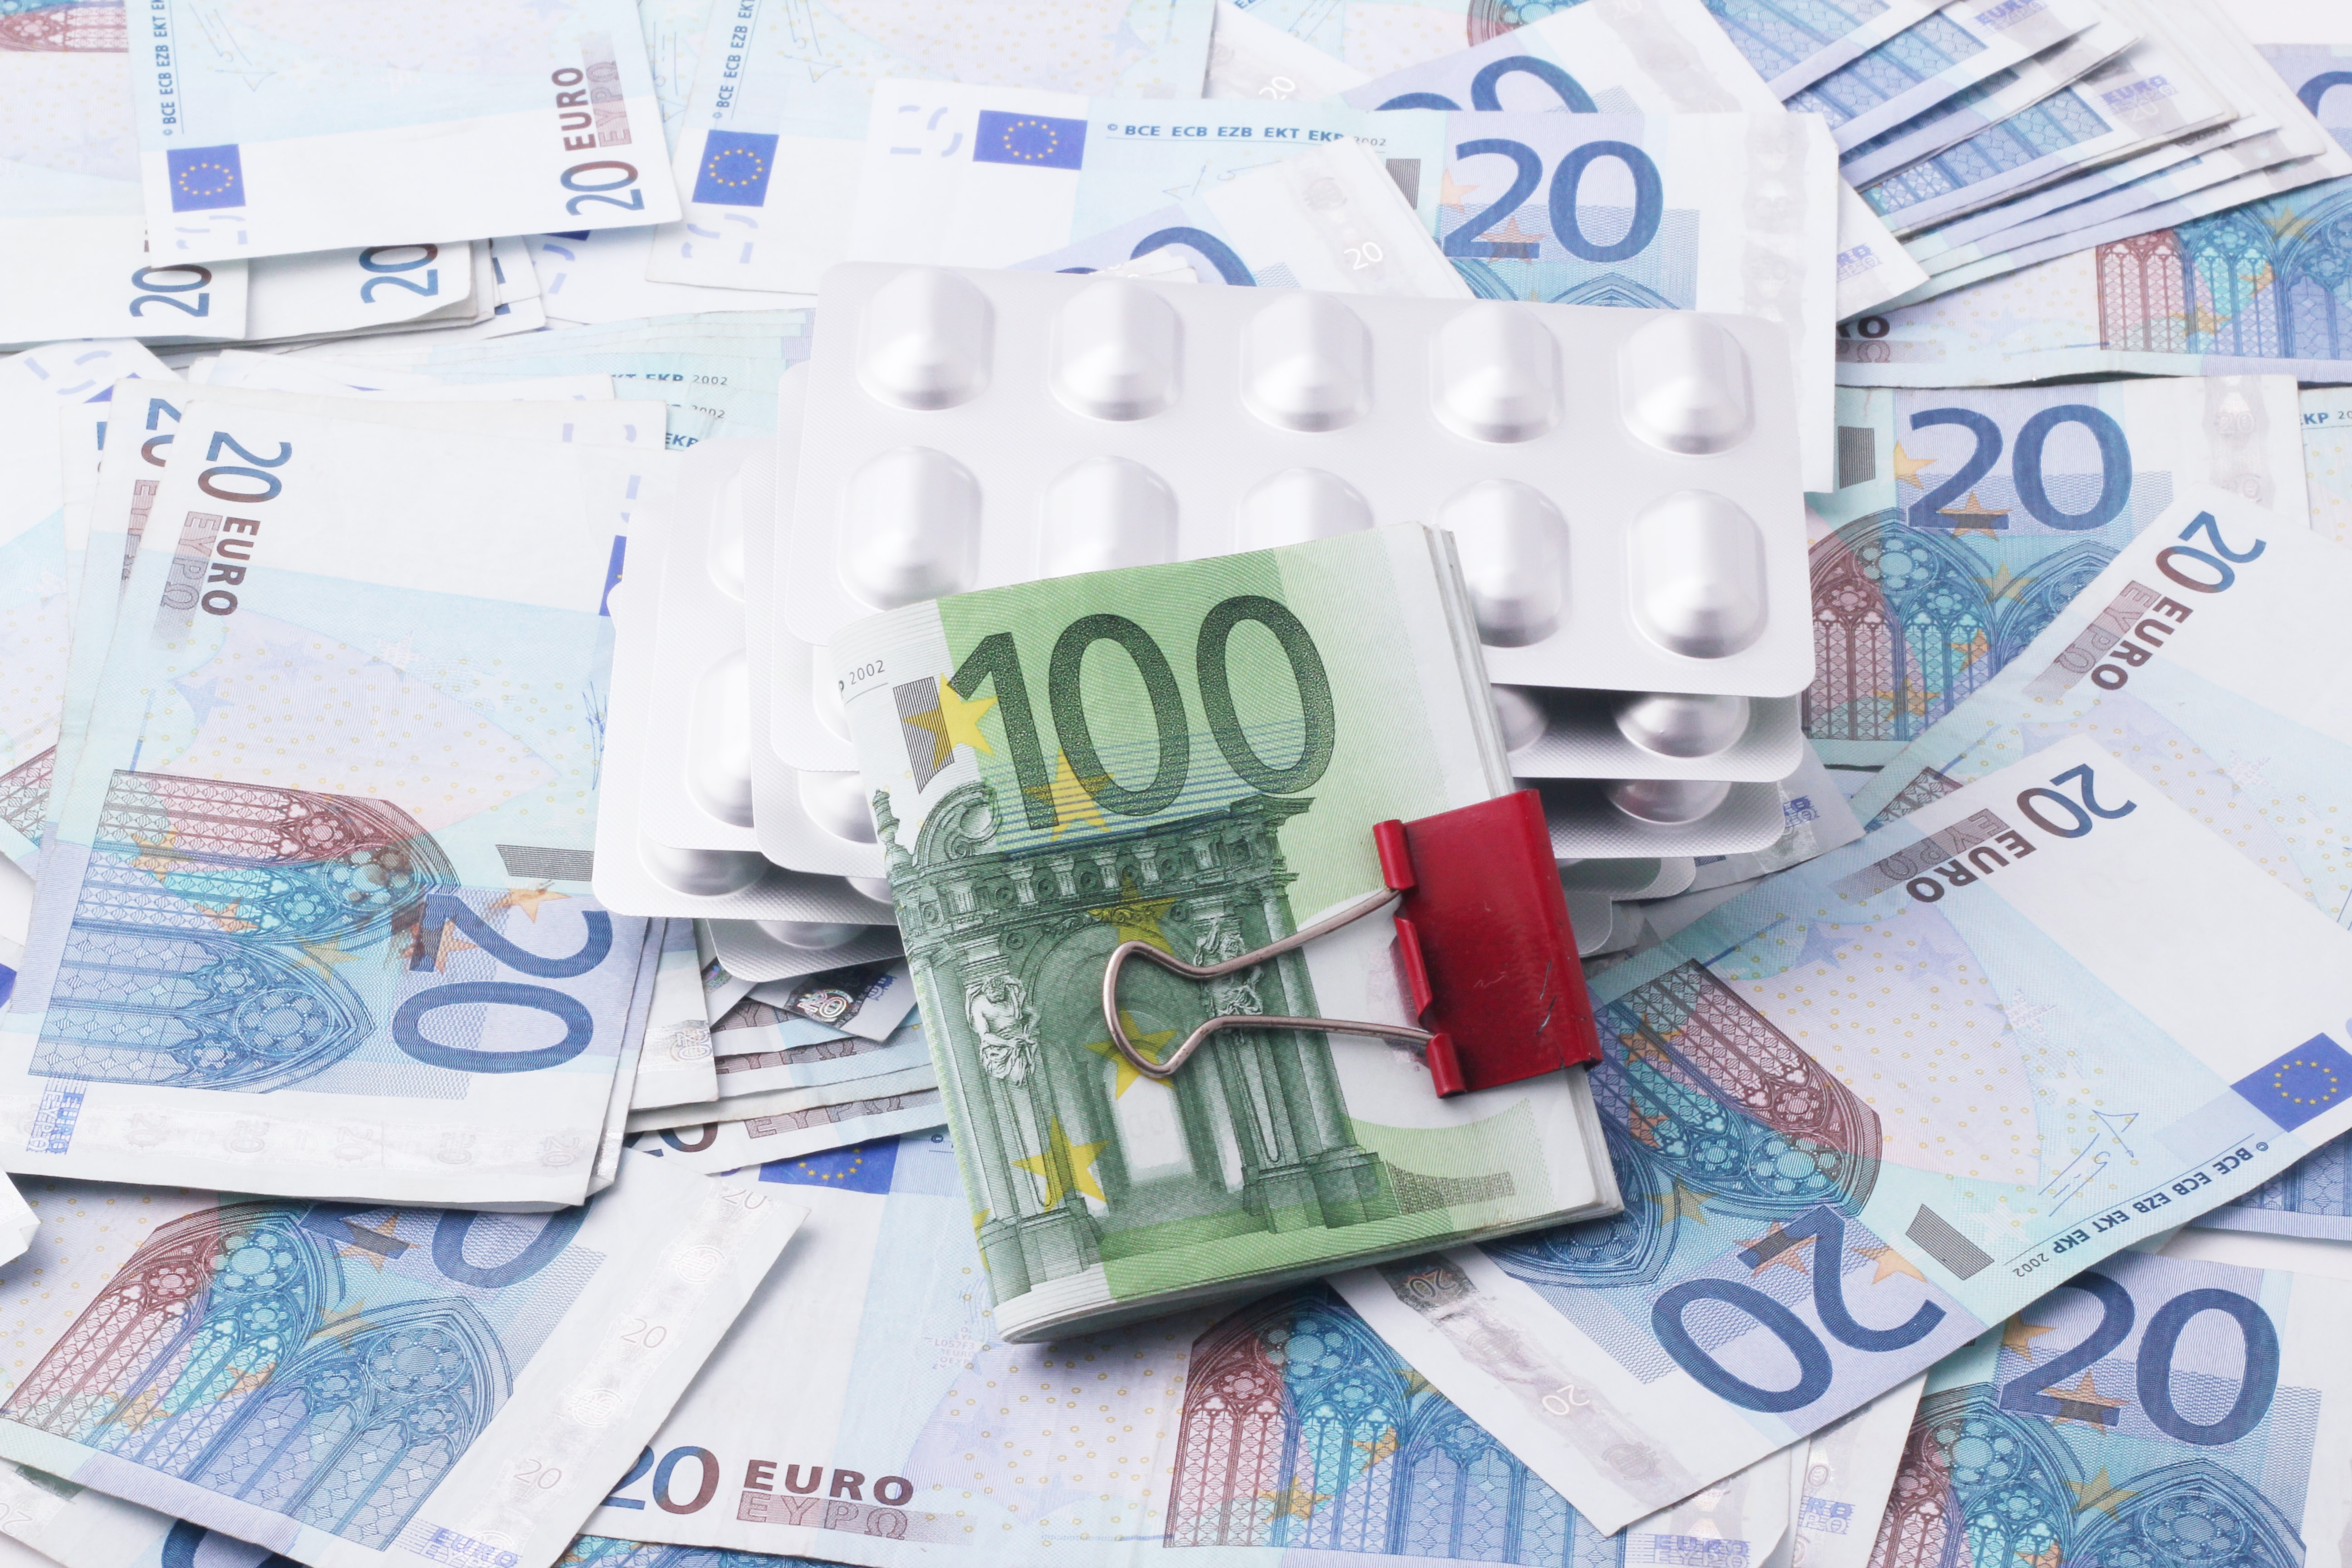

## **Data Collection**
The dataset was obtained from [Kaggle](https://www.kaggle.com/code/ozgurba/medical-insurance-cost/data).

In [1]:
# Importing libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
# Loading Train dataset
df = pd.read_csv('insurance.csv')

# Top 5 records
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


The variables represent the insurance contractor information.

**Age**: age of the primary beneficiary.

**Sex**: gender - male or female.

**BMI**: body mass index - parameter calculated based on the ratio of weight and height (kg/m²).

**Children**: number of dependents.

**Smoker**: smoking - yes or no.

**Region**: insurance contractor's residential area in US - northeast, southeast, southwest, northwest.

**Charges**: cost billed by health insurance company annually.

# **Exploratory Data Analysis**

In [65]:
# Top 5 records
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [66]:
# Shape of dataset
df.shape

(1338, 7)

In [67]:
# Checking for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [68]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [69]:
# Numerical dataset description
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [70]:
# Categorical dataset description
df.describe(include=['O'])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


### **Age Analysis**

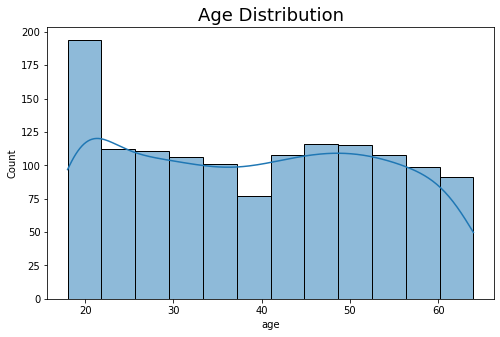

In [71]:
# Histogram of age
plt.figure(figsize=(8,5))
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution', fontsize=18)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


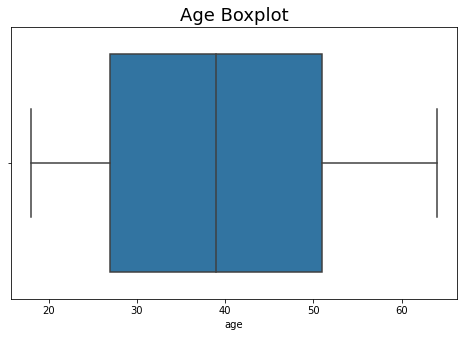

In [72]:
# Boxplot of age
plt.figure(figsize=(8,5))
sns.boxplot(df['age'])
plt.title('Age Boxplot', fontsize=18)
plt.show()

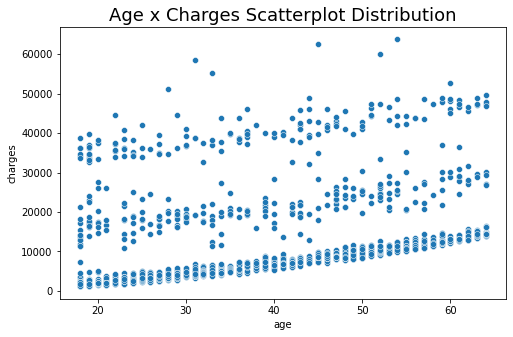

In [73]:
# age x charges scatterplot
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='age', y='charges')
plt.title('Age x Charges Scatterplot Distribution', fontsize=18)
plt.show()

### **Body Mass Index Analysis**

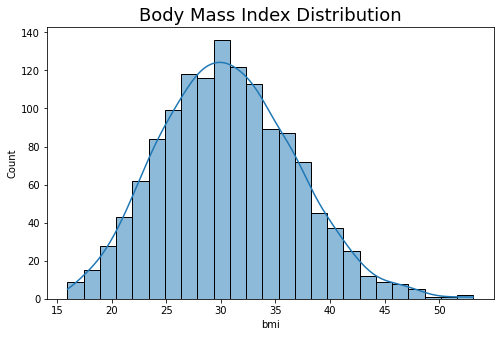

In [74]:
# Histogram of BMI
plt.figure(figsize=(8,5))
sns.histplot(df['bmi'], kde=True)
plt.title('Body Mass Index Distribution', fontsize=18)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


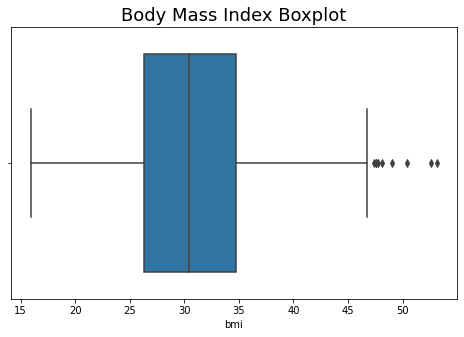

In [75]:
# Boxplot of BMI
plt.figure(figsize=(8,5))
sns.boxplot(df['bmi'])
plt.title('Body Mass Index Boxplot', fontsize=18)
plt.show()

### **Children Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


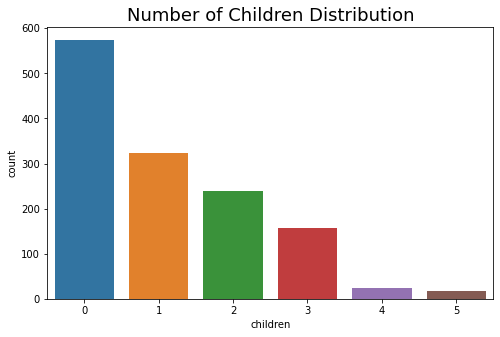

In [76]:
# Histogram of Children
plt.figure(figsize=(8,5))
sns.countplot(df['children'])
plt.title('Number of Children Distribution', fontsize=18)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


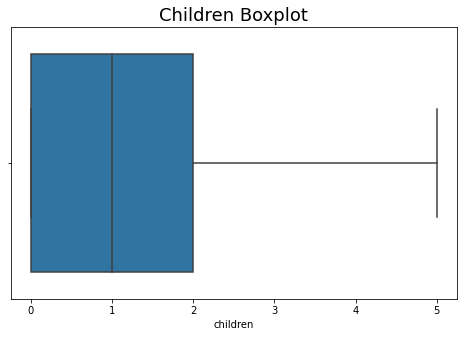

In [77]:
# Boxplot of Children
plt.figure(figsize=(8,5))
sns.boxplot(df['children'])
plt.title('Children Boxplot', fontsize=18)
plt.show()

### **Gender Analysis**

In [78]:
# Value Counts
print('Male  :', df['sex'].value_counts()[0])
print('Female:', df['sex'].value_counts()[1])


Male  : 676
Female: 662


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


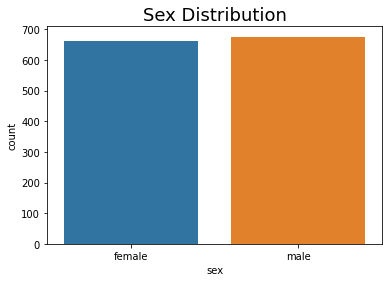

In [79]:
#Visualization
plt.figure(figsize=(6,4))
sns.countplot(df['sex'])
plt.title('Sex Distribution', fontsize=18)
plt.show()

### **Smoking Analysis**

In [80]:
# Value Counts:
print('Smokers    :', df['smoker'].value_counts()[1])
print('Non-Smokers:', df['smoker'].value_counts()[0])

Smokers    : 274
Non-Smokers: 1064


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


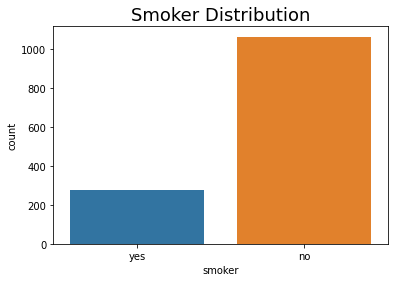

In [81]:
#Visualization
sns.countplot(df['smoker'])
plt.title('Smoker Distribution', fontsize=18)
plt.show()

### **Region Analysis**

In [82]:
# Value Counts:
print('South-East Region :', df['region'].value_counts()[0])
print('North-West Region :', df['region'].value_counts()[1])
print('South-West Region :', df['region'].value_counts()[2])
print('North-East Region :', df['region'].value_counts()[3])

South-East Region : 364
North-West Region : 325
South-West Region : 325
North-East Region : 324


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


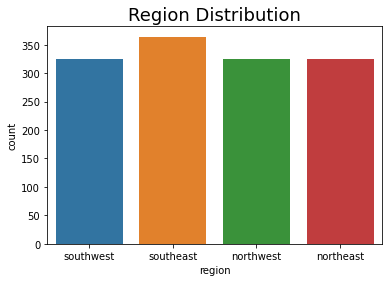

In [83]:
#Visualization
sns.countplot(df['region'])
plt.title('Region Distribution', fontsize=18)
plt.show()

### **Analysis of Charges**

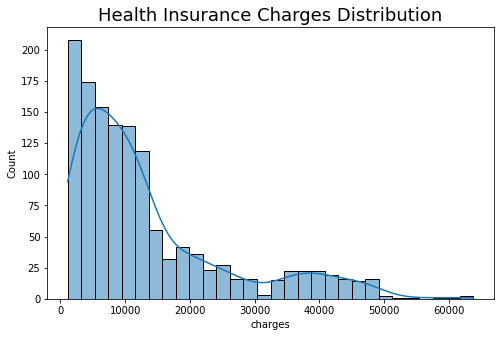

In [84]:
# Histogram of Health Insurance Charges
plt.figure(figsize=(8,5))
sns.histplot(df['charges'], kde=True)
plt.title('Health Insurance Charges Distribution', fontsize=18)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


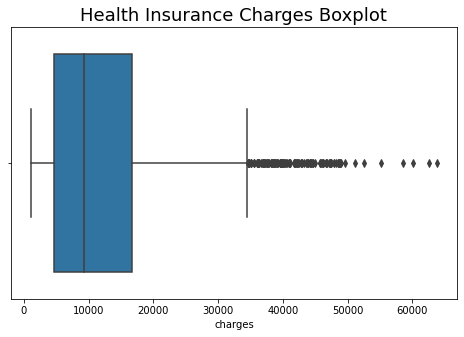

In [85]:
# Boxplot of  Health Insurance Charges
plt.figure(figsize=(8,5))
sns.boxplot(df['charges'])
plt.title('Health Insurance Charges Boxplot', fontsize=18)
plt.show()

### **The Correlation Between Fetures**

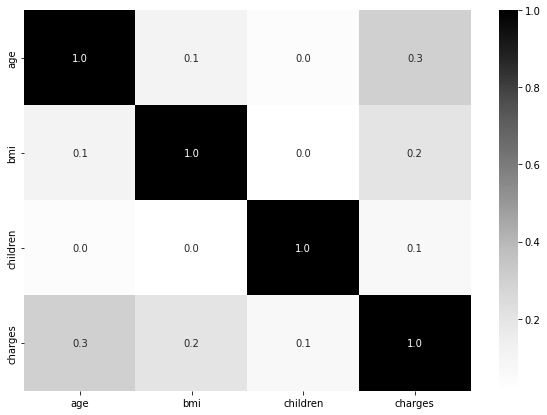

In [114]:
corr = df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, cbar=True, annot=True, cmap='Greys', fmt='.1f')

# **Data Pre-Processing**

In [87]:
# Top 5 records
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### **Encoding**

In [88]:
# Encoding the sex column
df.replace({"sex":{"male":0,"female":1}}, inplace = True)

In [89]:
# Encoding the smoker column
df.replace({"smoker":{"no":0,"yes":1}}, inplace = True)

In [90]:
# Encoding the region column
df.replace({"region":{"southeast":0,"southwest":1,"northeast":2,"northwest":3}}, inplace = True)

In [91]:
# Top 5 recordsd
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


### **Splitting Target and Independent Feature**

In [92]:
# Splitting columns
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [93]:
# Top 5 independent feature records
x.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,1
1,18,0,33.770,1,0,0
2,28,0,33.000,3,0,0
3,33,0,22.705,0,0,3
4,32,0,28.880,0,0,3


In [94]:
# Top 5 target records
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

### **Splitting Training and Testing Data**

In [95]:
# Train Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [96]:
print("The number of rows and columns of x :",x.shape)
print("The number of rows and columns of x_train :",x_train.shape)
print("The number of rows and columns of x_test :",x_test.shape)

The number of rows and columns of x : (1338, 6)
The number of rows and columns of x_train : (1070, 6)
The number of rows and columns of x_test : (268, 6)


# **Model Building and Training**

In [99]:
# Importing evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score

### **Linear Regression Model**

In [101]:
# Linear Regression
from sklearn.linear_model import LinearRegression

# Loading model
LinearRegression = LinearRegression()

# Taining model
LinearRegression = LinearRegression.fit(x_train, y_train)

# Prediction on testing data
y_pred = LinearRegression.predict(x_test)

#Scores
print('The R squarred value is: ',r2_score(y_test, y_pred))
print('The mean squarred error is: ',mean_squared_error(y_test, y_pred))

The R squarred value is:  0.7989875396812892
The mean squarred error is:  31987105.236794222


### **Ridge Regression Model**

In [104]:
# Ridge Regression
from sklearn.linear_model import Ridge

# Loading model
Ridge = Ridge()

# Taining model
Ridge = Ridge.fit(x_train, y_train)

# Prediction on testing data
y_pred = Ridge.predict(x_test)

#Scores
print('The R squarred value is: ', r2_score(y_test, y_pred))
print('The mean squarred error is: ', mean_squared_error(y_test, y_pred))

The R squarred value is:  0.7986338753917961
The mean squarred error is:  32043383.821855944


### **Lasso Regression Model**

In [105]:
# Lasso Regression
from sklearn.linear_model import Lasso

# Loading model
Lasso = Lasso()

# Taining model
Lasso = Lasso.fit(x_train, y_train)

# Prediction on testing data
y_pred = Lasso.predict(x_test)

#Scores
print('The R squarred value is: ', r2_score(y_test, y_pred))
print('The mean squarred error is: ', mean_squared_error(y_test, y_pred))

The R squarred value is:  0.7989610806278691
The mean squarred error is:  31991315.664968047


### **Random Forest Regressor Model**

In [106]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

# Loading model
RandomForestRegressor = RandomForestRegressor()

# Taining model
RandomForestRegressor = RandomForestRegressor.fit(x_train, y_train)

# Prediction on testing data
y_pred = RandomForestRegressor.predict(x_test)

#Scores
print('The R squarred value is: ', r2_score(y_test, y_pred))
print('The mean squarred error is: ', mean_squared_error(y_test, y_pred))

The R squarred value is:  0.8782289154182507
The mean squarred error is:  19377428.101418145


As we can see, the Random Forest Regressor Model presents better performance than the others, once its R squared is the highest.